In [1]:
from utils import *
from fluxtower_parse import *
import numpy as np       
import datetime as dt  
import matplotlib.pyplot as plt

In [3]:
# Correct and save processed SnD data

# Data location:
dpath= '/Volumes/Data/ICECAPSarchive/fluxtower/raw_extracted/SnD/'
# Log data parsing issues here: 
logf = '/Users/heather/ICECAPS-ACE/log.txt'
# HMP data location:
hmp_loc = '/Volumes/Data/ICECAPSarchive/fluxtower/processed/HMP/'
# Save data location:
out_loc = '/Volumes/Data/ICECAPSarchive/fluxtower/processed/SnD/'

# Start and stop date:
all_start = dt.datetime(2019,5,30,0,0)
all_stop = dt.datetime(2019,9,1,0,0)

all_days = pd.date_range(all_start,all_stop,freq='1D')

In [ ]:
# Loop through and splite into daily files
for i in range(0,len(all_days)-1):
    start = all_days[i]
    stop = all_days[i+1]
    day_str = str(start.date()) 
    print(str(start) + ' to ' + str(stop))

    # Get Snd
    snd=extract_snd_data(start,stop,dpath,logf)

    # Only do the rest if there's data in the file
    if snd.empty==False:
        # Get HMP1
        HMP1 = pd.read_csv(hmp_loc+'HMP1_%s'%day_str, index_col=0, parse_dates=[0])

        tc = HMP1['Ta']
        tk = tc + 273.15 # convert to celcius

        # Fill any nans with nearest valid value
        new_idx = pd.date_range(pd.to_datetime(start).round('1s'),pd.to_datetime(stop).round('1s'),freq='1s' )
        tk= tk.reindex(new_idx, method='nearest')

        # Temperature correction
        snd['HMP1_T'] = tk
        snd['depth_Tcorrected'] = snd['depth'] * np.sqrt(snd['HMP1_T']/273.15)

        # Save corrected data
        snd.to_csv(out_loc+'snd_%s'%(str(start.date())))

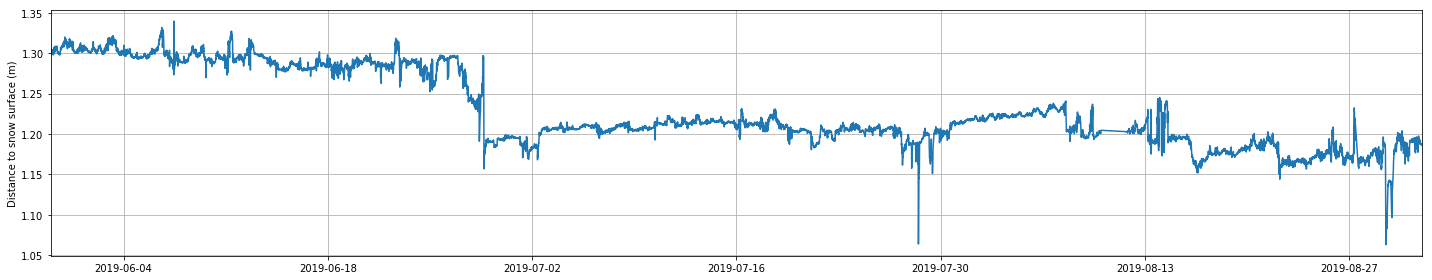

In [4]:
# Plot all corrected SnD data. 

# Start and stop date:
start = dt.datetime(2019,5,30,0,0)
stop = dt.datetime(2019,9,1,0,0)

# Days to loop through
days = pd.date_range(start,stop,freq='1D')
all_snd = pd.DataFrame(columns=['C', 'Q', 'V', 'depth', 'diff', 'HMP1_T', 'depth_Tcorrected'])
for day in days: 
    day_str = str(day.date())
    if os.path.isfile(out_loc+'snd_%s'%day_str):
        day_snd = pd.read_csv(out_loc+'snd_%s'%day_str, index_col=0, parse_dates=[0])
        all_snd = all_snd.append(day_snd)


        
#new_idx = pd.date_range(pd.to_datetime(str(start),format='%Y-%m-%d %H:%M:%S'),pd.to_datetime(str(stop),format='%Y-%m-%d %H:%M:%S'),freq='10min')
all_snd = all_snd[~all_snd.index.duplicated()]
#all_snd= all_snd.reindex(new_idx, fill_value=np.NaN)
        
fig = plt.figure(figsize=(20,4))
ax1 = fig.add_subplot(111)
ax1.grid(True)
ax1.plot(all_snd.index,all_snd['depth_Tcorrected'])
#ax1.plot(all_snd.index,all_snd['depth'])
ax1.set_ylabel('Distance to snow surface (m)')

#ax1.set_ylim(-200,200)
#ax1.set_xlabel('Frequency (Hz)')
#ax1.legend()

#ax2 = fig.add_subplot(212)
#ax2.grid(True)
#ax2.plot(plot_times,LHF)
#ax2.set_ylabel('LHF W/m2')
#ax2.axhline(0)
#ax1.set_xlabel('Frequency (Hz)')
#ax1.legend()

ax1.set_xlim(start,stop)
fig.tight_layout()

In [8]:
all_snd['depth_Tcorrected']

# Save to one file

all_snd['depth_Tcorrected'].to_csv('/Users/heather/ICECAPS-ACE/Processed/All_SnD_%s_to_%s'%(str(start.date()),str(stop.date())))


In [12]:
pd.to_datetime(str(start),format='%y%m%d')

ValueError: unconverted data remains: -07-01 00:00:00

In [14]:
str(start)

'2019-07-01 00:00:00'